In [4]:
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [93]:
data = pd.read_csv('../data/AirQualityUCI.csv', sep=";").dropna(1).set_index('Date')
for c in data.columns:
    data[c] = data[c].apply(lambda v: float(str(v).replace('.', '').replace('0000', '').replace(',', '.')))
    data[c] = data[c].astype(float)
    
data.columns = [data[c].name.replace('(', '.').replace(')', '.') for c in data.columns]
        
data = data.reset_index()
data['DateTime'] = data['Date'].map(str) + data['Time'].map(lambda v: ' ' + str(v).rstrip('0').rstrip('.'))
data = data.set_index('DateTime').drop(['Date', 'Time'], axis=1)
data.head()

,CO.GT.,PT08.S1.CO.,NMHC.GT.,C6H6.GT.,PT08.S2.NMHC.,NOx.GT.,PT08.S3.NOx.,NO2.GT.,PT08.S4.NO2.,PT08.S5.O3.,T,RH,AH
DateTime,,,,,,,,,,,,,
10/03/2004 18,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
10/03/2004 19,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
10/03/2004 20,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
10/03/2004 21,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
10/03/2004 22,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


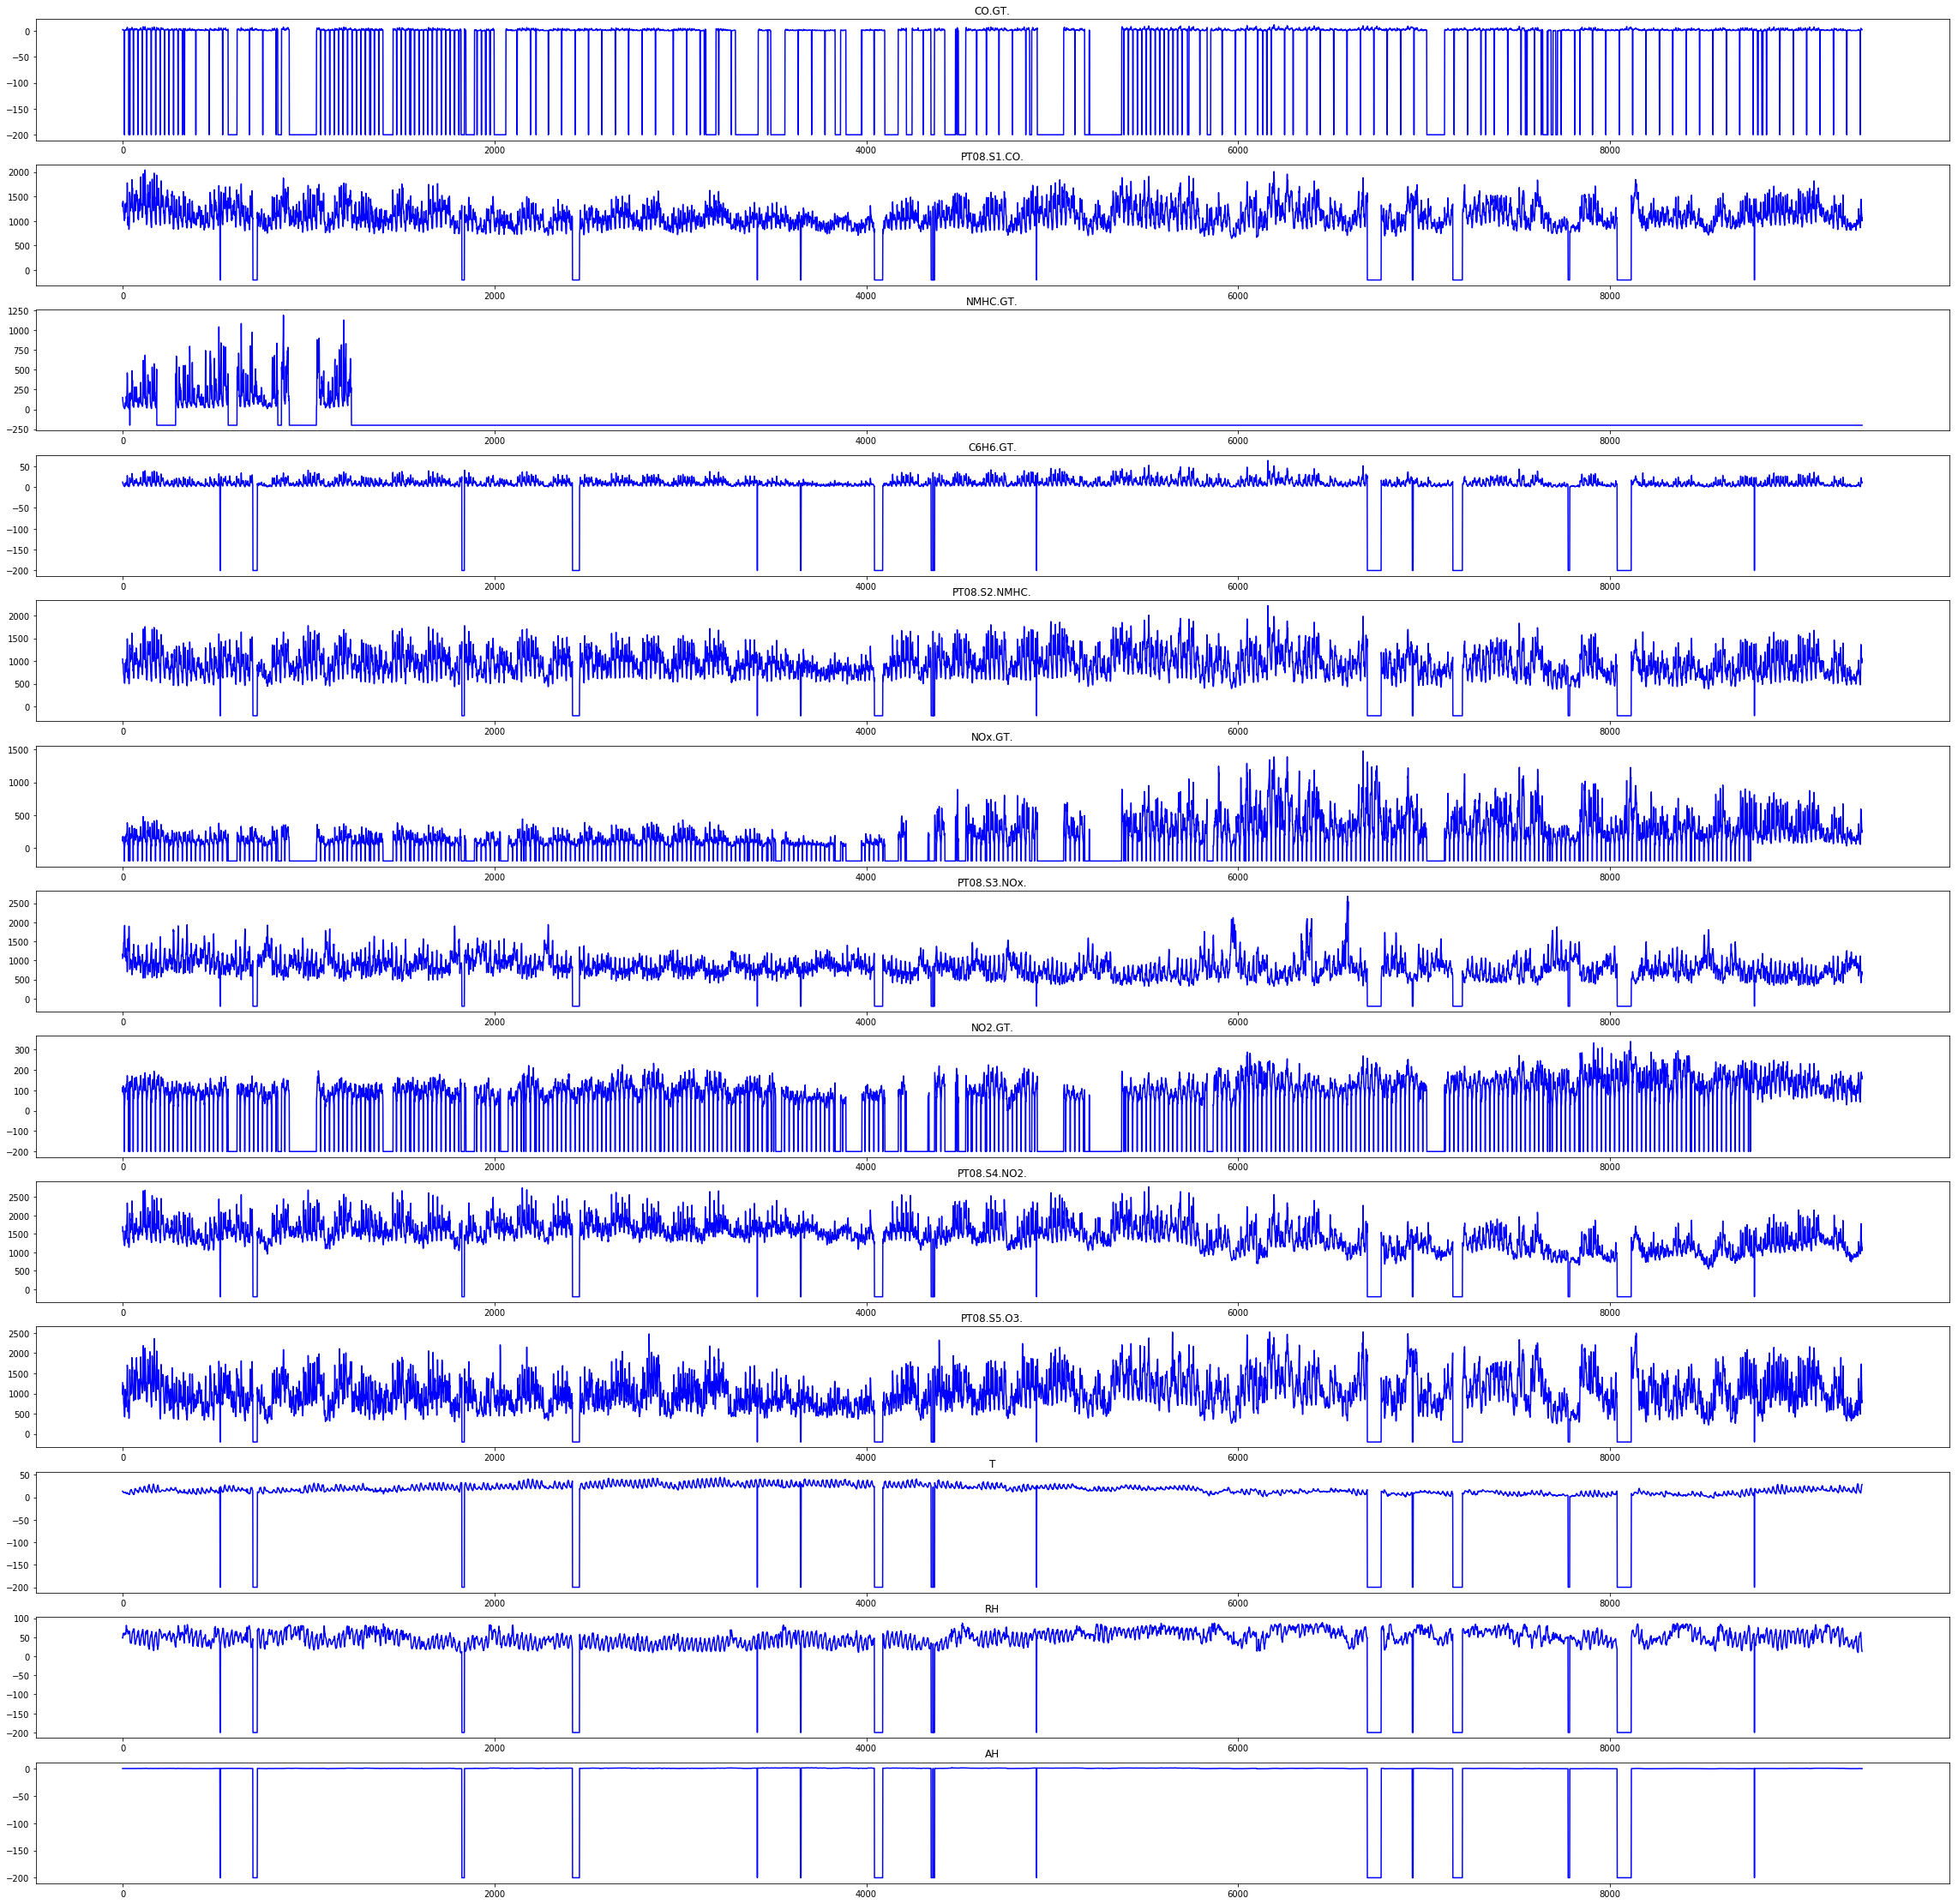

In [94]:
fig, axs = plt.subplots(len(data.columns), 1, figsize=(40, 40))

for i, ax in enumerate(axs):
    ax.plot(list(range(data.shape[0])), data[data.columns[i]], 'b-')
    ax.set_title(data.columns[i])
    
None

In [5]:
#%R install.packages('tseries')

In [ ]:
%%R -i data -o arima_fit
library('stats')
pad <- 10
n <- nrow(data)
arima_fit <- data.frame(id=seq(1, n))
for (c in colnames(data)) {
    try({
        s <- ts(data[ ,c])
        x_ax <- seq(1, n)
        fit <- character(n)
        fit[1:pad-1] <- mean(s)
        for (i in seq(pad, n)){
            model <- arima(s[1:i-1], order=c(3, 3, 3))
            fit[i] <- predict(model, n.ahead=1, se.fit=TRUE)
        }
        arima_fit[c] <- fit
        plot(x_ax, data[1:n,c], xlab='Observation', ylab=c, type='l', xlim=c(0, n), lwd=.5, color='blue')
        lines(x_ax, fit, color='red', type='l', lwd=.5)
    })
}

/usr/local/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: Error in arima(s[1:i - 1], order = c(3, 3, 3)) : 
  non-stationary AR part from CSS

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: In addition: 
  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: There were 46 warnings (use warnings() to see them)
  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: 

  warnings.warn(x, RRuntimeWarning)


In [1]:
pred_arima = arima_fit.rename(columns={'id': 'Index'}).set_index('Index')
print(pred_arima.columns)
for c in pred_arima.columns:
    plt.figure(figsize=(20,10))
    plt.plot(list(range(data.shape[0])), pred_arima, 'r-')
    plt.plot(list(range(data.shape[0])), data[data.columns[c]], 'b-')
    plt.xlim([9100, len(pred_arima)])
    plt.show()
    
None

NameError: name 'arima_fit' is not defined

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')

history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)

pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()